In [1]:
#!/usr/bin/env python
import string
import hashlib
import sys
import re
import numpy as np
from scipy import stats
"""
# -----------------------------------------------------------------------------
# this is the hive entry point:
# parameters are accepted as a tab delimited stream
# the stream must be read and broken
# variables will be assigned to the 'parameters' passed
# as a reference
# PARAMETERS EXPEXTED:
#
# -----------------------------------------------------------------------------
# 
"""
# -----------------------------------------------------------------------------
#
#  GOOD WORDS LIST
# list_values2 = "dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.google.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
# list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
#
# BAD WORDS LIST
# list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"   
# list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
#
#
# BAD DOMAINS LIST
# list_values3 = "27media.urlvalidation.amatorskihokej.gilbertargentina.arcoinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
#
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL size function1.
def func_url_lengh(var1):
    return len(var1)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
### Every URL with More than 80 chars, will be massive .
## URL isbig=1/0 function2.
def func_url_big(var1):
    if (len(var1) > 80):
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL number of '@' chars function3.
def func_url_count_at(var1):
    return var1.count('@')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL punctuation count function4.
def func_url_count_dot(var1):
    return var1.count('.')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL isipyn=1/0 function5.
## Search if matches pattern : "http://xx.xx.xx.xx/anythingnonspace7662u.wkjw3932"
def func_url_is_ip(var1):
    cleanvar=var1.strip('http://').strip('https://')
    m1 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))',cleanvar)
    m2 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)',cleanvar)
    m3 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)([\S]+)',cleanvar)
   
    if (m1 or m2 or m3):
        return 1
    else:
        return 0    
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function7.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function6.
def func_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function8.
def func_ks_en_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #list_values2 = "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    # Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function9.
def func_bad_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function10.
def func_bad_ks_en_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #list_values2 = "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function11.
def func_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function12.
def func_ks_phish_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function13.
def func_bad_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function14.
def func_bad_ks_phish_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD words in URL based in our Internal Phishing function15.
def func_bad_words_domain(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values3 = "27media.urlvalidation.amatorskihokej.gilbertargentina.arcoinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis ignore web domain and focus on typical pyshing/malware site names.
    to_clear=cleanvar.split(".")[0]+"."
    #print("to_clear="+to_clear)
    if list_values3.find(to_clear) == -1:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Languages eng ynverified=0 else =1
def func_url_lang_en_ynverified(var1):
    # https://commoncrawl.github.io/cc-crawl-statistics/plots/languages
    catalogue_valid_langs = ("eng","rus","jpn","deu","fra","zho","spa","por","ita","pol","nld","ces","tur","vie","ind","swe",\
                       "ara","fas","kor","ron","hun","ell","dan","ukr","fin","tha","nor","bul","slk","cat","heb","srp",\
                       "hrv","lit","msa","est","slv","lav","hin","ben","aze","lat","isl","tam","sqi","bos","kat","hye",\
                       "glg","urd","eus","mkd","kaz","mal","nno","mon","bel","nep","uzb","tel","mya","tgl","afr","mar",\
                       "swa","cym","kan","sin","guj","khm","tat","som","epo","kur","gle","kir","pan","fao","oci","tgk",\
                       "pus","amh","fry","ltz","mlg","war","lao","mlt","kin","ori","san","hau","gla","bre","cos","roh",\
                       "bak","hat","jav","yid","bod","ceb","grn","uig","sco","tuk","blu","div","ina","kal","tir","bih",\
                       "mri","nya","snd","sun","vol","asm","zul","glv","ile","orm","que","smo","sna","syr","xho","yor",\
                       "aar","abk","haw","ibo","kha","lin","sot","iku","lug","nso","run","tsn")
    catalogue_invalid_langs = ("<unknown>","unknown","<other>","other","")
    if var1==None:
        return 1
    elif (var1[:3].lower().startswith(catalogue_valid_langs)):
        return 0
    elif (var1[:3].lower().startswith(catalogue_invalid_langs)):
        return 1
    else:
        return 0
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
while True:
    line = sys.stdin.readline()
    if not line:
        break
    line = string.strip(line, "\n ")
    clienturls = string.split(line, "\t")
    clienturl = clienturls[0]
    url_lengh=func_url_lengh(clienturl)
    massiveurl=func_url_big(clienturl)
    count_at=func_url_count_at(clienturl)
    count_dot=func_url_count_dot(clienturl)
    url_is_ip=func_url_is_ip(clienturl)
    url_kl_en=func_kl_en_url(clienturl)
    count_dot_com=func_count_dot_com(clienturl)
    url_ks_en=func_ks_en_url(clienturl)
    print ("\t".join([ url_lengh, massiveurl, count_at, count_dot, url_is_ip, url_kl_en, count_dot_com,url_ks_en ]))
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# TEST FUNCTIONS5
print("F5")
print(func_url_is_ip("www.google.com"))
print(func_url_is_ip("35.190.74.53"))
#
# TEST FUNCTIONS7
print("F7")
print(func_kl_en_url("www.google.com"))
print(func_kl_en_url("www.10.112.41.21.com/bug.html"))
print(func_kl_en_url("www.tciauto.com/js/prototype/prototype.js"))
# TEST FUNCTIONS9
print("F9")
print(func_bad_kl_en_url("www.google.com"))
print(func_bad_kl_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_kl_en_url("www.tciauto.com/js/prototype/prototype.js"))
# TEST FUNCTIONS8
print("F8")
print(func_ks_en_url("www.google.com"))
print(func_ks_en_url("www.10.112.41.21.com/bug.html"))
print(func_ks_en_url("www.tciauto.com/js/prototype/prototype.js"))
# TEST FUNCTIONS10
print("F10")
print(func_bad_ks_en_url("www.google.com"))
print(func_bad_ks_en_url("www.10.112.41.21.com/bug.html"))
print(func_bad_ks_en_url("www.tciauto.com/js/prototype/prototype.js"))
#
# TEST FUNCTIONS11
print("F11")
print(func_kl_phish_url("www.google.com"))
print(func_kl_phish_url("www.10.112.41.21.com/bug.html"))
print(func_kl_phish_url("www.tciauto.com/js/prototype/prototype.js"))
# TEST FUNCTIONS13
print("F13")
print(func_bad_kl_phish_url("www.google.com"))
print(func_bad_kl_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_kl_phish_url("www.tciauto.com/js/prototype/prototype.js"))
# TEST FUNCTIONS12
print("F12")
print(func_ks_phish_url("www.google.com"))
print(func_ks_phish_url("www.10.112.41.21.com/bug.html"))
print(func_ks_phish_url("www.tciauto.com/js/prototype/prototype.js"))
# TEST FUNCTIONS14
print("F14")
print(func_bad_ks_phish_url("www.google.com"))
print(func_bad_ks_phish_url("www.10.112.41.21.com/bug.html"))
print(func_bad_ks_phish_url("www.tciauto.com/js/prototype/prototype.js"))
# TEST FUNCTIONS15
print("F15")
print(func_bad_words_domain("www.google.com"))
print(func_bad_words_domain("www.10.112.41.21.com/bug.html"))
print(func_bad_words_domain("www.tciauto.com/js/prototype/prototype.js"))
#

F5
0
1
F7
0.0
-328.04527262467434
370.01622984524306
F9
0
1
1
F8
1.0
0.010363878041822367
0.29749496918785295
F10
0
1
1
F11
197.42956955516755
-316.0192293834367
368.7343343532466
F13
1
1
1
F12
0.6750781537165951
0.010363878041822386
0.1023725717454872
F14
0
1
1
F15
0
1
1


In [2]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats

sc = pyspark.SparkContext(appName="phishingURL-Clean-AUTOML-V3-BestModel-Discovery")
sqlContext = SQLContext(sc)

import h2o
from h2o.automl import H2OAutoML

import subprocess
subprocess.run('unset http_proxy', shell=True)

h2o.init(ip="localhost",port=54321)
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL size function1.
def func_url_lengh(var1):
    return len(var1)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
### Every URL with More than 80 chars, will be massive .
## URL isbig=1/0 function2.
def func_url_big(var1):
    if (len(var1) > 80):
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL number of '@' chars function3.
def func_url_count_at(var1):
    return var1.count('@')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL punctuation count function4.
def func_url_count_dot(var1):
    return var1.count('.')
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL isipyn=1/0 function5.
## Search if matches pattern : "http://xx.xx.xx.xx/anythingnonspace7662u.wkjw3932"
def func_url_is_ip(var1):
    cleanvar=var1.strip('http://').strip('https://')
    m1 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))',cleanvar)
    m2 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)',cleanvar)
    m3 = re.search('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))([/]+)([\S]+)',cleanvar)
   
    if (m1 or m2 or m3):
        return 1
    else:
        return 0    
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------   
## URL count(".com") function7.
def func_count_dot_com(var1):
    return var1.count(".com") #overlapping
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function6.
def func_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function8.
def func_ks_en_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #list_values2 = "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    # Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function9.
def func_bad_kl_en_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    list_values2 += "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function10.
def func_bad_ks_en_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common non-Malware/phishing sites used in internal webtraffic
    list_values2 = "google.com.dazn.com.livesport.atlassian.net.performgroup.com.confluence.performgroup.com.google.co.uk.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.www.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #list_values2 = "google.com.dazn.com.performgroup.com.goal.com.bitly.com.goo.gl.amazon.com.office.com.gmail.com.apple.com.trivago.com.expedia.com.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.www.google.com.amazon.apple.trivago.expedia.hotels.andcastles.andhouseboats.andigloos.andteepees.andriversidecabins.andlakesidecabins.andpondsidecabins.andstreamadjacentcabins.andcabinsthatarentnearanybodiesofwaterwhatsoever.andlakehouses.andregularhousesandlodgesandskilodgesandallthings.ski/ChaletRelatedAndBoutiquesAnd5StarSuitesAndRetreatsAndBungalowsAndJungleBungalowsAndOtherKindaLessExcitingBungalowsAndCabanasAndOceansideCabanasAndSeaSideCabanasWhichSeemLikeTheSameThingAndBedAndBreakfastsAndJustBedsBecauseThoseAreKindOfARequirementInRoomsOfAnyKindInOurOpinionAndCottagesAndVacationHomesAndHostelsAndYouCanGetRewardedBasicallyEverywhereAndResortsAndGetawaysAndInnsAndHarborInnsAndVillasForGuysNamedJamieFromNorthEasternMiamiAndVillasForHumansNamedAnyOtherKindOfHumanNameAndTreehousesAndHousesNearTreesAndRanchesForPeopleWhoReallyLikeFarmAnimalsAndRanchesForPeopleWhoJustFeelKindOfSoSoAboutFarmAnimalsAndRanchesInGeneralAndCliffHousesAndRewardsAndYesWeAreSurprisedYouAreStillTypingAtThisPointButHeyWeStillHaveMoreAccomodationsSoWeWillJustKeepListingThemBroBroAndBeachGetawaysAndSnowyGetawaysAndThoseAreTheOnlyTwoKindsOfGetawaysAndMansionsAndLoftsAndFarmStaysAndFarmStayRetreatsSpecificallyInNewZealandBecauseNothingSaysLuxuryLikeAnExcessOfHayAndGoatNoisesAndIceHotelsAndIceCabinsAndIceLodgesAndHotelsWithBalconyCapabilitiesAndHotelsWithRooftopsBecauseEveryHotelNeedsARoofItIsKindOfJustLogisticalAndTimesharesAndCountryHomesAndPalazzinasAndYesWeKnowWhatPalazzinasAreDontActLikeWeDontWhoIsTheExpertHereAndPenthousesAndManorsAndStatelyManorsWhichFeelPrettySimilarAndTownhousesAndPalacesAndHousesAndCasasWhichAreHousesButInSpanishAndGuestHousesForWomenNamedTammyWhoLiveForAGreatDealAndRewardsForEveryoneElseWhoLikesAGreatDealAndAllTypesOfPlacesForPetsAndAllTypesOfPlacesForNotPetsAndThemedHotelsAndPirateHotelsAndFairyTaleHotelsAndHauntedHotelsAndHauntedMotelsOrToPutItAnotherWayMotelsAndYesWeAreStillGoingAndFamilyResortsAndPlacesNearGoatYogaAndPlacesWherePeopleHaveMusclesAndPlacesThatServeMelonBetweenTheHoursOf6And10AMAnd.HouseYachtsAndYachtClubsAndOtherThingsOnOrNearWaterAndDolphinMotelsInLowerSanDiegoAndAlsoYurts.com.www.1.2.3.4.5.6.7.8.9.0.llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch.co.uk"
    #Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
#
# -----------------------------------------------------------------------------    
## URL KL from URL TO English Language function11.
def func_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"   
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    return KL(values1,values2)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## URL "Kolmogorov-Smirnov test KS pvalue= ks_2samp function12.
def func_ks_phish_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    values2=np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    return np.asscalar(pvalue)
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N from KL from URL TO English Language function13.
def func_bad_kl_phish_url(var1):
    def KL(P,Q):
        epsilon = 0.00001
        P = P+epsilon
        Q = Q+epsilon
        divergence = np.sum(P*np.log(P/Q))
        return np.asscalar(divergence)
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    ## Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2=np.asarray(list_of_ord_values2)
    kl_value=KL(values1,values2)
    if kl_value < 0.0:
        return 1
    elif kl_value >= 100.01:
        return 1
    else:
        return 0
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD URL Y/N "Kolmogorov-Smirnov test KS pvalue= ks_2samp function14.
def func_bad_ks_phish_url(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    len_var1=len(cleanvar)
    idx_var1=cleanvar[:8]
    list_values1 = list(cleanvar)
    list_of_ord_values1 = [ord(char) for char in list_values1]
    values1 = np.asarray(list_of_ord_values1)
    values1= np.sort(values1)
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values2 = "27media.ro.urlvalidation.com.amatorskihokej.pl.gilbertargentina.com.arcoinhive.com.track.o7go.com.cdntc.advancedmactuner.com.apple.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.com.webmine.cz.park.above.com.track.amishbrand.com.epiphany-walpole.org.track.o7go.com.picturesetc.net.epiphany-walpole.org.park.above.com.load.jsecoin.com.mail.cometgroup-eg.com.mail.arenacorporativo.com.hydra.edos.cl.mail.cometgroup-eg.com.mail.cometgroup-eg.com.santoshdiesel.com.mail.sumtexa.com.errors.newdatastatsserv.com/mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.com.junpiterfutbol.com.errors.newdatastatsserv.com/mac-error.gif.coin-services.info.errors.newdatastatsserv.com/newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis start on the same webdomain name
    idx_var2 = list_values2.find(idx_var1)
    start_values2=list_values2[:idx_var2]
    list_values2 = list(start_values2+list_values2)
    list_of_ord_values2 = [ord(char) for char in list_values2]
    list_of_ord_values2 =list_of_ord_values2[:len_var1]
    values2 = np.asarray(list_of_ord_values2)
    values2 = np.sort(values2)
    (Darray,pvalue)=stats.ks_2samp(values1, values2)
    scalar_pvalue=np.asscalar(pvalue)
    if scalar_pvalue >=0.5:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## BAD words in URL based in our Internal Phishing function15.
def func_bad_words_domain(var1):
    cleanvar=var1.strip('http://').strip('https://').strip('www.')
    # URLS with at least 4166 characters
    ## TODO : Complete this list with common Malware/phishing sites used in internal webtraffic
    list_values3 = "27media.urlvalidation.amatorskihokej.gilbertargentina.arcoinhive.track.o7go.cdntc.advancedmactuner.com-repairing-macbook.live.bestofpantac58.club.anastasiabeauties.com.ssl.icel-analytics.webmine.park.above.track.amishbrand.epiphany-walpole.track.o7go.picturesetc.epiphany-walpole.park.above.jsecoin.cometgroup-eg.arenacorporativo.hydra.edos.cl.mail.cometgroup-eg.cometgroup-eg.santoshdiesel.sumtexa.errors.newdatastatsserv.mac-error.gif.check4free.goodthewaysystemcontents.club.goodwaysystemforlinks.icu.ephzhb.ba.jshosting.bid.junpiterfutbol.junpiterfutbol.errors.newdatastatsserv.mac-error.gif.coin-services.info.errors.newdatastatsserv.mac-error.gif.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy.lh4.googleusercontent.com/proxy.junpiterfutbol.com/wp-content/uploads.junpiterfutbol.com/wp-content/themes/magazinevibe.junpiterfutbol.com/wp-includes/js/mediaelement.junpiterfutbol.com/wp-content/plugins.lh4.googleusercontent.com/proxy.lh3.googleusercontent.com/proxy/Kio4wI3UK3zZzRs.lh3.googleusercontent.com/proxy/m6VPEbuhm1bUutlLMXrO0IG9laOxq-.lh3.googleusercontent.com/proxy/WsQX20fScfePa3ywk8TItAbHri0WIJg27chYNFm09rbddhntflFDd5PlwFGLbcQ-bojUBBGDLHBusy08cjL7m6J_.trackcmp.net/visit.trackcmp.net/redir.bttrack.com/pixel/cookiesync.dbrsupportportal.dellbackupandrecovery.com.errors.newdatastatsserv.com/mac-error.gif.sc.iasds01.com/dtc.mrfinancechallenge.com.lh4.googleusercontent.com/proxy/l6PVvv0DTBegtdzFoqZW48oOKdK6Ogiz-.mrfinancechallenge.com.park.above.com.query.network.lh5.googleusercontent.com/proxy/3bKkRRVFT75mOCZKFTno0pyp3zjRU5Gssm3xK.webacc12.sd5.ghst.net.webacc12.sd5.ghst.net.apps4612.srvrize7.live.girrjaqgjb.com.webmine.cz.amatorskihokej.pl.junpiterfutbol.com/wp-includes.lh4.googleusercontent.com/proxy/VwiFM4ubjgiJxpWl3TtlqXfogV5h8GbEfioNr3Y.lh4.googleusercontent.com/proxy/HAwE2myEwEP3w9ApAURprguN6biMao1jllCLQ.lh4.googleusercontent.com/proxy/yvj5Z3VZ5xl8Xe6ecO4D.lh6.googleusercontent.com/proxy/FGgHhIQmg8P.tciauto.com.tci.track.o7go.com.personaly.click.ws003.coinhive.com.apc994.com.c.smxindia.in.glyphsjmuyt.xyz.c.o5o4o6.com.ttegjzxzxyetf.com.zambiafootballshop.com.worldnaturenet.xyz.apc994.com.tech-beats.com.c.o5o4o6.com.filanwuatuese.ml.jshosting.win.filanwuatuese.ml.fmtrendgames.com.estoyonline.cl.xr0.specialrewards16.com.voice-mailportalmanagement.ufaharigirlsministries.co.ug.competition8006.ttiprize75.life.mybestaskflash.icu.c.smxindia.in.urlvalidation.com.c.o5o4o6.com.cdntc.advancedmactuner.com.cdntc.advancedmactuner.com.examhome.net.learningtoolkit.club.o12zs3u2n.com.8b0b17dc1f9f8010.com.c.traktum.com.competition2699.ttiprize21.life.apple.com-fast-macbook.live.coffeetrials.in.net.wzdzht7am5.com.urlvalidation.com.qamopo.com.27media.ro.personaly.click.net.madgicomedia.club.c.traktum.com.anastasiabeauties.com.stretfordendflags.com.coinhive.com.coin-hive.com.bournfavor.club.ttegjzxzxyetf.com.c.o5o4o6.com.minergate.com.goodandmainlystablelinkslast.icu.8b0b17dc1f9f8010.com.alwaysup.thecentersitetodownloadcontentfree.icu.c.px9y36.com.apc994.com.cashbeet.com.pitchinforbaseball.org.murrychristmas.in.net.competition2212.pmrprize35.live.cpdbalochistan.org.c.px9y36.com"
    #
    ##Making sure the analysis ignore web domain and focus on typical pyshing/malware site names.
    to_clear=cleanvar.split(".")[0]+"."
    #print("to_clear="+to_clear)
    if list_values3.find(to_clear) == -1:
        return 0
    else:
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# # BUG      : https://issues.apache.org/jira/browse/SPARK-12157
# # Solution : https://stackoverflow.com/questions/9452775/converting-numpy-dtypes-to-native-python-types/11389998
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Transformation DI ynverified=1/0 FROM yes/no
def func_url_verified(var1):
    if var1==None:
        return 1
    if ( var1.lower()=='yes'):
        return 1
    elif (var1.lower()=='no'):
        return 0
    else :
        return 1
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
## Languages eng ynverified=0 else =1
def func_url_lang_en_ynverified(var1):
    # https://commoncrawl.github.io/cc-crawl-statistics/plots/languages
    catalogue_valid_langs = ("eng","rus","jpn","deu","fra","zho","spa","por","ita","pol","nld","ces","tur","vie","ind","swe",\
                       "ara","fas","kor","ron","hun","ell","dan","ukr","fin","tha","nor","bul","slk","cat","heb","srp",\
                       "hrv","lit","msa","est","slv","lav","hin","ben","aze","lat","isl","tam","sqi","bos","kat","hye",\
                       "glg","urd","eus","mkd","kaz","mal","nno","mon","bel","nep","uzb","tel","mya","tgl","afr","mar",\
                       "swa","cym","kan","sin","guj","khm","tat","som","epo","kur","gle","kir","pan","fao","oci","tgk",\
                       "pus","amh","fry","ltz","mlg","war","lao","mlt","kin","ori","san","hau","gla","bre","cos","roh",\
                       "bak","hat","jav","yid","bod","ceb","grn","uig","sco","tuk","blu","div","ina","kal","tir","bih",\
                       "mri","nya","snd","sun","vol","asm","zul","glv","ile","orm","que","smo","sna","syr","xho","yor",\
                       "aar","abk","haw","ibo","kha","lin","sot","iku","lug","nso","run","tsn")
    catalogue_invalid_langs = ("<unknown>","unknown","<other>","other","")
    if var1==None:
        return 1
    elif (var1[:3].lower().startswith(catalogue_valid_langs)):
        return 0
    elif (var1[:3].lower().startswith(catalogue_invalid_langs)):
        return 1
    else:
        return 0
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------
#
# UDF Functional DI Converstions 
func_url_verified_udf = udf(func_url_verified, IntegerType())
#
## NOT REQUIRED CONFUSES MODEL !!
### func_url_lang_en_ynverified_udf = udf(func_url_lang_en_ynverified, IntegerType())
#
# UDF COEFICIENT FUNCTIONS : [1-11] 
func_url_lengh_udf = udf(func_url_lengh, IntegerType())
func_url_big_udf = udf(func_url_big, IntegerType())
func_url_count_at_udf = udf(func_url_count_at, IntegerType())
func_url_count_dot_udf = udf(func_url_count_dot, IntegerType())
func_url_is_ip_udf = udf(func_url_is_ip, IntegerType())
func_count_dot_com_udf = udf(func_count_dot_com, IntegerType())
func_kl_en_url_udf = udf(func_kl_en_url, FloatType())
func_ks_en_url_udf = udf(func_ks_en_url, FloatType())
func_bad_kl_en_url_udf = udf(func_bad_kl_en_url, IntegerType())
func_bad_ks_en_url_udf = udf(func_bad_ks_en_url, IntegerType())
func_kl_phish_url_udf = udf(func_kl_phish_url, FloatType())
func_ks_phish_url_udf = udf(func_ks_phish_url, FloatType())
func_bad_kl_phish_url_udf = udf(func_bad_kl_phish_url, IntegerType())
func_bad_ks_phish_url_udf = udf(func_bad_ks_phish_url, IntegerType())
func_bad_words_domain_udf = udf(func_bad_words_domain, IntegerType())
#
# -----------------------------------------------------------------------------
# -----------------------------------------------------------------------------    
#
# Arguments
#
process_date="20181112"
ccrwal_raw_file="hdfs:///user/siemanalyst/data/raw/commoncrawl/dt="+process_date+"/clean-CC-MAIN-2018-43-index-.*.json"
phishtank_raw_file="hdfs:///user/siemanalyst/data/raw/phishtank/dt="+process_date+"/*.json"
#
ccrawl_staged_file="hdfs:///user/siemanalyst/data/staged/commoncrawl/dt="+process_date+"/"
phishtank_staged_file="hdfs:///user/siemanalyst/data/staged/phishtank/dt="+process_date+"/"
#
internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=20181116/*.json"
#
#
## Get all URL Commom Crawl from
## List of Top Level Domains : *.com *.org *.co.uk *.ru *.net *.cn *.cz *.kp *.us "
# 
ccrawl_traindf = sqlContext.read.json(ccrwal_raw_file)
ccrawl_traindf.printSchema()
#
#### MODEL1 MODEL3 CCRAWL HAS NOT PHISHING URL
#.withColumn('ynverified',lit(0).cast('int'))\

## NOT REQUIRED CONFUSES MODEL !!
### 
#### MODEL 2
#.withColumn('ynverified',func_url_lang_en_ynverified_udf(ccrawl_traindf['languages']).cast('int') )\

drop_ccrawl_cols=['charset','digest','filename','verification_time','length','mime','mime-detected','offset','status']
## Assume URLS as not phishing ynverified=0 if EN as phishing ynverified=1
ccrawl_trainds = ccrawl_traindf\
.filter("url is not NULL")\
.drop(*drop_ccrawl_cols)\
.withColumn('ynverified',lit(0).cast('int'))\
.drop('languages')\
.withColumn('url_length',func_url_lengh_udf(col('url')).cast('int'))\
.withColumn('massiveurl',func_url_big_udf(col('url')).cast('int'))\
.withColumn('count_at',func_url_count_at_udf(col('url')).cast('int'))\
.withColumn('count_dot',func_url_count_dot_udf(col('url')).cast('int'))\
.withColumn('url_is_ip',func_url_is_ip_udf(col('url')).cast('int'))\
.withColumn('count_dot_com',func_count_dot_com_udf(col('url')).cast('int'))\
.withColumn('url_kl_en',func_kl_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_en',func_bad_kl_en_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_en',func_ks_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_en',func_bad_ks_en_url_udf(col('url')).cast('int'))\
.withColumn('url_kl_phish',func_kl_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_phish',func_bad_kl_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_phish',func_ks_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_phish',func_bad_ks_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_bad_words_domain',func_bad_words_domain_udf(col('url')).cast('int'))
#
ccrawl_trainds.printSchema()
ccrawl_persist=ccrawl_trainds.coalesce(1).write.json(ccrawl_staged_file , mode="overwrite")
#
phishtank_traindf= sqlContext.read.json(phishtank_raw_file)
phishtank_traindf.printSchema()
#
drop_phish_cols=['details','online','phish_detail_url','phish_id','submission_time','target','verification_time']
#
phishtank_trainds=phishtank_traindf\
.filter("url is not NULL")\
.drop(*drop_phish_cols)\
.withColumn('ynverified',func_url_verified_udf(col('verified')).cast('int'))\
.drop('verified')\
.withColumn('url_length',func_url_lengh_udf(col('url')).cast('int'))\
.withColumn('massiveurl',func_url_big_udf(col('url')).cast('int'))\
.withColumn('count_at',func_url_count_at_udf(col('url')).cast('int'))\
.withColumn('count_dot',func_url_count_dot_udf(col('url')).cast('int'))\
.withColumn('url_is_ip',func_url_is_ip_udf(col('url')).cast('int'))\
.withColumn('count_dot_com',func_count_dot_com_udf(col('url')).cast('int'))\
.withColumn('url_kl_en',func_kl_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_en',func_bad_kl_en_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_en',func_ks_en_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_en',func_bad_ks_en_url_udf(col('url')).cast('int'))\
.withColumn('url_kl_phish',func_kl_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_kl_phish',func_bad_kl_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_ks_phish',func_ks_phish_url_udf(col('url')).cast('double'))\
.withColumn('url_bad_ks_phish',func_bad_ks_phish_url_udf(col('url')).cast('int'))\
.withColumn('url_bad_words_domain',func_bad_words_domain_udf(col('url')).cast('int'))
phishtank_trainds.printSchema()
#
phishtank_persist=phishtank_trainds.coalesce(1).write.json(phishtank_staged_file , mode="overwrite")
#
#
sc.stop()
#
print("Factor Calculation Done!")
#

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /opt/cloudera/parcels/Anaconda-5.1.0.1/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_dlki2g4
  JVM stdout: /tmp/tmp_dlki2g4/h2o_siemanalyst_started_from_python.out
  JVM stderr: /tmp/tmp_dlki2g4/h2o_siemanalyst_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_siemanalyst_bzn6gc
H2O cluster total nodes:,1
H2O cluster free memory:,5.176 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


root
 |-- charset: string (nullable = true)
 |-- digest: string (nullable = true)
 |-- filename: string (nullable = true)
 |-- languages: string (nullable = true)
 |-- length: string (nullable = true)
 |-- mime: string (nullable = true)
 |-- mime-detected: string (nullable = true)
 |-- offset: string (nullable = true)
 |-- status: string (nullable = true)
 |-- url: string (nullable = true)

root
 |-- url: string (nullable = true)
 |-- ynverified: integer (nullable = false)
 |-- url_length: integer (nullable = true)
 |-- massiveurl: integer (nullable = true)
 |-- count_at: integer (nullable = true)
 |-- count_dot: integer (nullable = true)
 |-- url_is_ip: integer (nullable = true)
 |-- count_dot_com: integer (nullable = true)
 |-- url_kl_en: double (nullable = true)
 |-- url_bad_kl_en: integer (nullable = true)
 |-- url_ks_en: double (nullable = true)
 |-- url_bad_ks_en: integer (nullable = true)
 |-- url_kl_phish: double (nullable = true)
 |-- url_bad_kl_phish: integer (nullable = true

In [1]:
#
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
sc = pyspark.SparkContext(appName="phishingURL-ModelBuild-AUTOML-V3-BestModel-Discovery")
sqlContext = SQLContext(sc)

import h2o
from h2o.automl import H2OAutoML

import subprocess
subprocess.run('unset http_proxy', shell=True)

h2o.init(ip="localhost",port=54321)
#
#
# Arguments
#
process_date="20181112"
#
ccrawl_staged_file="hdfs:///user/siemanalyst/data/staged/commoncrawl/dt="+process_date+"/*.json"
phishtank_staged_file="hdfs:///user/siemanalyst/data/staged/phishtank/dt="+process_date+"/*.json"
internal_staged_urlpredict_files="hdfs:///user/siemanalyst/data/staged/urltopredict/dt=20181116/*.json"
#
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
urlpredict_internaldata_dfile=sqlContext.read.json(internal_staged_urlpredict_files)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL")\
.groupby(col('url')).agg( F.first(col('ynverified')).alias('ynverified'),\
     F.first(col('url_length')).alias('url_length'), F.first(col('massiveurl')).alias('massiveurl'),\
     F.first(col('count_at')).alias('count_at'), F.first(col('count_dot')).alias('count_dot'),\
     F.first(col('url_is_ip')).alias('url_is_ip'),F.first(col('count_dot_com')).alias('count_dot_com'),\
     F.first(col('url_kl_en')).alias('url_kl_en'), F.first(col('url_bad_kl_en')).alias('url_bad_kl_en'),\
     F.first(col('url_ks_en')).alias('url_ks_en'), F.first(col('url_bad_ks_en')).alias('url_bad_ks_en'),\
     F.first(col('url_kl_phish')).alias('url_kl_phish'),F.first(col('url_bad_kl_phish')).alias('url_bad_kl_phish'),\
     F.first(col('url_ks_phish')).alias('url_ks_phish'),F.first(col('url_bad_ks_phish')).alias('url_bad_ks_phish'),\
     F.first(col('url_bad_words_domain')).alias('url_bad_words_domain'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
urlpredict_internaldata_dfile.printSchema()
#
#
internal_phishing_malware_df=urlpredict_internaldata_dfile.\
select(col('url'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),
       col('url_bad_words_domain').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
internal_phishing_malware_df.printSchema()
#
#
#https://deepsense.ai/optimize-spark-with-distribute-by-and-cluster-by/
ccrawl_staged=sqlContext.read.json(ccrawl_staged_file)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL").\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),
       col('url_bad_words_domain').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
ccrawl_staged.printSchema()
#
#
#https://deepsense.ai/optimize-spark-with-distribute-by-and-cluster-by/
phishtank_staged=sqlContext.read.json(phishtank_staged_file)\
.filter("url IS NOT NULL")\
.filter("ynverified IS NOT NULL")\
.filter("url_length IS NOT NULL")\
.filter("massiveurl IS NOT NULL")\
.filter("count_at IS NOT NULL")\
.filter("count_dot IS NOT NULL")\
.filter("url_is_ip IS NOT NULL")\
.filter("count_dot_com IS NOT NULL")\
.filter("url_kl_en IS NOT NULL")\
.filter("url_bad_kl_en IS NOT NULL")\
.filter("url_ks_en IS NOT NULL AND")\
.filter("url_bad_ks_en IS NOT NULL")\
.filter("url_kl_phish IS NOT NULL")\
.filter("url_bad_kl_phish IS NOT NULL")\
.filter("url_ks_phish IS NOT NULL")\
.filter("url_bad_ks_phish IS NOT NULL")\
.filter("url_bad_words_domain IS NOT NULL").\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),
       col('url_bad_words_domain').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
phishtank_staged.printSchema()
#
#
phishtank_plus_urlpredict_internaldata=internal_phishing_malware_df.union(phishtank_staged).\
select(col('url').cast('string'),col('ynverified').cast('int'),\
       col('url_length').cast('int'), col('massiveurl').cast('int'),\
       col('count_at').cast('int'), col('count_dot').cast('int'),\
       col('url_is_ip').cast('int'), col('count_dot_com').cast('int'),\
       col('url_kl_en').cast('double'), col('url_bad_kl_en').cast('int'),\
       col('url_ks_en').cast('double'), col('url_bad_ks_en').cast('int'),\
       col('url_kl_phish').cast('double'), col('url_bad_kl_phish').cast('int'),\
       col('url_ks_phish').cast('double'), col('url_bad_ks_phish').cast('int'),
       col('url_bad_words_domain').cast('int'))\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
phishtank_plus_urlpredict_internaldata.printSchema()
#
#
phishtank_train_pd=phishtank_plus_urlpredict_internaldata.toPandas()
phishtank_test_pd=phishtank_plus_urlpredict_internaldata.toPandas().tail(5000)                                                                        
phishtank_train=h2o.H2OFrame(phishtank_train_pd)
phishtank_test=h2o.H2OFrame(phishtank_test_pd)
#
#
ccrawl_train_pd=ccrawl_staged.toPandas()  
ccrawl_test_pd=ccrawl_staged.toPandas().head(5000)
ccrawl_train_hf=h2o.H2OFrame(ccrawl_train_pd)
ccrawl_test_hf=h2o.H2OFrame(ccrawl_test_pd)
#
#
###### TRAINING PROCESS ############
# RBIND "Merge" all of 3 internal ccrawl and phishtank with rbind .
# function merge() doesn't work if both H2O/dataframes have same variables
#
train = ccrawl_train_hf.rbind(phishtank_train)
test = phishtank_test.rbind(ccrawl_test_hf)
#
#
print("train")
print(train.head(10))
print("test")
print(test.head(10))
#
#
# Identify predictors and response
x = train.columns
#
# test Learning is it a bit URL TRUE/FALSE
#y = 'massiveurl'
#
# Casual is it verified phishing from url characteristics TRUE/FALSE
y= 'ynverified'
x.remove(y)
#
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
#
# http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html
# Balance Classes to compensate unbalanced data
# Run AutoML for 40 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=40, seed=1999, balance_classes=True)
aml.train(x=x, y=y, training_frame=train)
#
sc.stop()
#
print("Model Training Done!")
#

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_172"; Java(TM) SE Runtime Environment (build 1.8.0_172-b11); Java HotSpot(TM) 64-Bit Server VM (build 25.172-b11, mixed mode)
  Starting server from /opt/cloudera/parcels/Anaconda-5.1.0.1/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpm0kk90wc
  JVM stdout: /tmp/tmpm0kk90wc/h2o_siemanalyst_started_from_python.out
  JVM stderr: /tmp/tmpm0kk90wc/h2o_siemanalyst_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_siemanalyst_mtnkmu
H2O cluster total nodes:,1
H2O cluster free memory:,5.176 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


root
 |-- url: string (nullable = true)
 |-- ynverified: long (nullable = true)
 |-- url_length: long (nullable = true)
 |-- massiveurl: long (nullable = true)
 |-- count_at: long (nullable = true)
 |-- count_dot: long (nullable = true)
 |-- url_is_ip: long (nullable = true)
 |-- count_dot_com: long (nullable = true)
 |-- url_kl_en: double (nullable = true)
 |-- url_bad_kl_en: long (nullable = true)
 |-- url_ks_en: double (nullable = true)
 |-- url_bad_ks_en: long (nullable = true)
 |-- url_kl_phish: double (nullable = true)
 |-- url_bad_kl_phish: long (nullable = true)
 |-- url_ks_phish: double (nullable = true)
 |-- url_bad_ks_phish: long (nullable = true)
 |-- url_bad_words_domain: long (nullable = true)

root
 |-- url: string (nullable = true)
 |-- ynverified: integer (nullable = true)
 |-- url_length: integer (nullable = true)
 |-- massiveurl: integer (nullable = true)
 |-- count_at: integer (nullable = true)
 |-- count_dot: integer (nullable = true)
 |-- url_is_ip: integer (nulla

url,ynverified,url_length,massiveurl,count_at,count_dot,url_is_ip,count_dot_com,url_kl_en,url_bad_kl_en,url_ks_en,url_bad_ks_en,url_kl_phish,url_bad_kl_phish,url_ks_phish,url_bad_ks_phish,url_bad_words_domain
http://0.cn/,0,12,0,0,1,0,0,-81.2642,1,0.10749,1,-10.3163,1,0.534416,0,1
http://0.cn/robots.txt,0,22,0,0,2,0,0,85.8588,0,0.54074,0,131.9,1,0.54074,0,1
http://glortzrediffmail.0.cn/,0,29,0,0,2,0,0,254.789,1,0.972789,0,212.462,1,0.972789,0,0
http://glortzrediffmail.0.cn/robots.txt,0,39,0,0,3,0,0,303.281,1,0.943936,0,309.107,1,0.943936,0,0
http://0-0-0.cn/,0,16,0,0,1,0,0,-142.413,1,0.0496544,1,-62.0097,1,0.0496544,1,0
http://0-0-0.cn/robots.txt,0,26,0,0,2,0,0,-39.9272,1,0.425472,1,-27.8402,1,0.218166,1,0
http://0-0-0.cn/robots.txt,0,26,0,0,2,0,0,-39.9272,1,0.425472,1,-27.8402,1,0.218166,1,0
http://0-0-0.cn/view.asp?id=470,0,31,0,0,2,0,0,-110.365,1,0.0505876,1,-232.331,1,0.0505876,1,0
http://0-0-0.cn/view.asp?id=476,0,31,0,0,2,0,0,-108.468,1,0.0505876,1,-230.947,1,0.0505876,1,0
http://0-0-0.cn/view.asp?id=477,0,31,0,0,2,0,0,-108.085,1,0.0505876,1,-230.649,1,0.0505876,1,0



test


url,ynverified,url_length,massiveurl,count_at,count_dot,url_is_ip,count_dot_com,url_kl_en,url_bad_kl_en,url_ks_en,url_bad_ks_en,url_kl_phish,url_bad_kl_phish,url_ks_phish,url_bad_ks_phish,url_bad_words_domain
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499/,1,61,0,0,1,0,1,-757.875,1,7.84305e-06,1,-563.624,1,2.08141e-05,1,0
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499,1,60,0,0,1,0,1,-757.875,1,7.84305e-06,1,-563.624,1,2.08141e-05,1,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=d3993414284beca7c9d20faab65c690f/,1,79,0,0,1,0,1,-568.747,1,0.000130907,1,-368.329,1,0.000130907,1,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=300308dff2f464ff22433eb64d8eb61f/,1,79,0,0,1,0,1,-579.733,1,0.000130907,1,-298.016,1,0.000130907,1,0
http://www.miroslavopava.cz/media/system/js/validateotp.htm,1,59,0,0,3,0,0,408.304,1,0.945549,0,566.836,1,0.480267,1,0
http://suelunn.com/aut.php?email=crl398@gmail.com,1,49,0,1,3,0,2,26.3968,0,0.738162,0,3.24908,0,0.985499,0,0
http://metaswitchweightloss.com/alibaba/alibaba/,1,48,0,0,1,0,1,366.07,1,0.723665,0,309.987,1,0.893086,0,0
http://odbiorcy.emoda.nnn.vc/login.php,1,38,0,0,4,0,0,216.156,1,0.999998,0,293.179,1,0.993644,0,0
http://www.onefd.edu.dz.forexwinz.com/facebook/FR/login.php,1,59,0,0,6,0,1,291.321,1,0.777684,0,296.767,1,0.595257,0,0
http://tmsvent.ru/layouts/joomla/edit/js/1/,1,43,0,0,1,0,0,166.841,1,0.825316,0,307.569,1,0.621292,0,0



AutoML progress: |████████████████████████████████████████████████████████| 100%
Model Training Done!


In [2]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
GBM_4_AutoML_20181121_220237,0.982441,0.117915,0.0773409,0.179445,0.0322005
GBM_5_AutoML_20181121_220237,0.982196,0.117522,0.0784529,0.17912,0.0320839
DRF_1_AutoML_20181121_220237,0.98214,0.138417,0.0736479,0.199707,0.0398828
GBM_grid_1_AutoML_20181121_220237_model_4,0.982056,0.121954,0.0775969,0.181018,0.0327674
GBM_grid_1_AutoML_20181121_220237_model_2,0.981755,0.142097,0.0834209,0.196294,0.0385313
StackedEnsemble_BestOfFamily_AutoML_20181121_220237,0.981599,0.122049,0.0733831,0.176906,0.0312956
GBM_3_AutoML_20181121_220237,0.980735,0.121588,0.0836523,0.183754,0.0337654
XGBoost_3_AutoML_20181121_220237,0.980483,0.117148,0.0824086,0.179346,0.032165
XGBoost_2_AutoML_20181121_220237,0.980479,0.118316,0.0810347,0.180293,0.0325056
StackedEnsemble_AllModels_AutoML_20181121_220237,0.979537,0.120757,0.0759089,0.176293,0.0310792


In [3]:
# The leader model is stored here
aml.leader


Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_4_AutoML_20181121_220237


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.032038608716061456
RMSE: 0.1789933203112939
LogLoss: 0.1104368001899767
Mean Per-Class Error: 0.013076062226827112
AUC: 0.9989919347707849
pr_auc: 0.9734875733563899
Gini: 0.9979838695415697
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16926173278881082: 


,0,1,Error,Rate
0,97721.0,1552.0,0.0156,(1552.0/99273.0)
1,1044.0,98210.0,0.0105,(1044.0/99254.0)
Total,98765.0,99762.0,0.0131,(2596.0/198527.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1692617,0.9869558,306.0
max f2,0.0949640,0.9914843,330.0
max f0point5,0.2717370,0.9883117,280.0
max accuracy,0.1730389,0.9869237,305.0
max precision,0.9992049,1.0,0.0
max recall,0.0118300,1.0,377.0
max specificity,0.9992049,1.0,0.0
max absolute_mcc,0.1692617,0.9738602,306.0
max min_per_class_accuracy,0.1931882,0.9865094,299.0
max mean_per_class_accuracy,0.1692617,0.9869239,306.0


Gains/Lift Table: Avg response rate: 50.00 %, avg score: 43.62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100087,0.9989105,2.0001914,2.0001914,1.0,0.9993374,1.0,0.9993374,0.0200193,0.0200193,100.0191428,100.0191428
,2,0.0200477,0.9977875,2.0001914,2.0001914,1.0,0.9983818,1.0,0.9988589,0.0200798,0.0400991,100.0191428,100.0191428
,3,0.0300060,0.9967482,2.0001914,2.0001914,1.0,0.9972322,1.0,0.9983190,0.0199186,0.0600177,100.0191428,100.0191428
,4,0.0400147,0.9958577,2.0001914,2.0001914,1.0,0.9962827,1.0,0.9978097,0.0200193,0.0800371,100.0191428,100.0191428
,5,0.0500133,0.9951078,2.0001914,2.0001914,1.0,0.9954717,1.0,0.9973423,0.0199992,0.1000363,100.0191428,100.0191428
,6,0.1000015,0.9906691,2.0001914,2.0001914,1.0,0.9930013,1.0,0.9951723,0.0999859,0.2000222,100.0191428,100.0191428
,7,0.1500149,0.9841040,2.0001914,2.0001914,1.0,0.9876156,1.0,0.9926530,0.1000363,0.3000584,100.0191428,100.0191428
,8,0.2000081,0.9740827,2.0001914,2.0001914,1.0,0.9794230,1.0,0.9893461,0.0999960,0.4000544,100.0191428,100.0191428
,9,0.3000196,0.9235931,1.9996877,2.0000235,0.9997482,0.9542139,0.9999161,0.9776348,0.1999919,0.6000463,99.9687728,100.0023520
,10,0.4000111,0.7452174,1.9940451,1.9985291,0.9969271,0.8506543,0.9991689,0.9458933,0.1993874,0.7994338,99.4045054,99.8529073




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.030980195281306397
RMSE: 0.17601191800928254
LogLoss: 0.11481846647705267
Mean Per-Class Error: 0.0577627601618117
AUC: 0.9828433403575679
pr_auc: 0.9457671312798152
Gini: 0.9656866807151359
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31520678595497204: 


,0,1,Error,Rate
0,10819.0,183.0,0.0166,(183.0/11002.0)
1,302.0,2076.0,0.127,(302.0/2378.0)
Total,11121.0,2259.0,0.0362,(485.0/13380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3152068,0.8954065,223.0
max f2,0.1093649,0.9045555,291.0
max f0point5,0.5051491,0.9229391,175.0
max accuracy,0.3152068,0.9637519,223.0
max precision,0.9996607,1.0,0.0
max recall,0.0007277,1.0,398.0
max specificity,0.9996607,1.0,0.0
max absolute_mcc,0.3152068,0.8739221,223.0
max min_per_class_accuracy,0.0801640,0.9407065,307.0
max mean_per_class_accuracy,0.1093649,0.9422372,291.0


Gains/Lift Table: Avg response rate: 17.77 %, avg score: 15.95 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100149,0.9967102,5.6265770,5.6265770,1.0,0.9982528,1.0,0.9982528,0.0563499,0.0563499,462.6576955,462.6576955
,2,0.0200299,0.9943031,5.6265770,5.6265770,1.0,0.9954327,1.0,0.9968428,0.0563499,0.1126997,462.6576955,462.6576955
,3,0.0300448,0.9918847,5.6265770,5.6265770,1.0,0.9931597,1.0,0.9956151,0.0563499,0.1690496,462.6576955,462.6576955
,4,0.0400598,0.9888831,5.6265770,5.6265770,1.0,0.9904975,1.0,0.9943357,0.0563499,0.2253995,462.6576955,462.6576955
,5,0.05,0.9855025,5.6265770,5.6265770,1.0,0.9871450,1.0,0.9929061,0.0559294,0.2813288,462.6576955,462.6576955
,6,0.1,0.9311455,5.4751892,5.5508831,0.9730942,0.9667581,0.9865471,0.9798321,0.2737595,0.5550883,447.5189235,455.0883095
,7,0.15,0.5693048,5.0462574,5.3826745,0.8968610,0.7909458,0.9566517,0.9168700,0.2523129,0.8074012,404.6257359,438.2674516
,8,0.2,0.1194389,2.3633305,4.6278385,0.4200299,0.2826821,0.8224963,0.7583230,0.1181665,0.9255677,136.3330530,362.7838520
,9,0.3,0.0200370,0.4709840,3.2422204,0.0837070,0.0481755,0.5762332,0.5216072,0.0470984,0.9726661,-52.9015980,224.2220353
,10,0.4,0.0086122,0.1261564,2.4632044,0.0224215,0.0131316,0.4377803,0.3944883,0.0126156,0.9852817,-87.3843566,146.3204373




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.03220047592601042
RMSE: 0.17944491056034556
LogLoss: 0.11791487917233465
Mean Per-Class Error: 0.06111520544364768
AUC: 0.9824413928555797
pr_auc: 0.9241275105479076
Gini: 0.9648827857111595
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2921926627448569: 


,0,1,Error,Rate
0,97446.0,1827.0,0.0184,(1827.0/99273.0)
1,2823.0,17892.0,0.1363,(2823.0/20715.0)
Total,100269.0,19719.0,0.0388,(4650.0/119988.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2921927,0.8849978,231.0
max f2,0.0972674,0.8977985,303.0
max f0point5,0.6025770,0.9141844,146.0
max accuracy,0.3441807,0.9614628,216.0
max precision,0.9991233,1.0,0.0
max recall,0.0010539,1.0,396.0
max specificity,0.9991233,1.0,0.0
max absolute_mcc,0.3046206,0.8621292,227.0
max min_per_class_accuracy,0.0688949,0.9375332,319.0
max mean_per_class_accuracy,0.0972674,0.9388848,303.0


Gains/Lift Table: Avg response rate: 17.26 %, avg score: 15.27 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100010,0.9968253,5.7923244,5.7923244,1.0,0.9982874,1.0,0.9982874,0.0579290,0.0579290,479.2324403,479.2324403
,2,0.0200020,0.9942216,5.7874975,5.7899109,0.9991667,0.9955110,0.9995833,0.9968992,0.0578808,0.1158098,478.7497466,478.9910934
,3,0.0300030,0.9916037,5.7778436,5.7858885,0.9975,0.9929639,0.9988889,0.9955874,0.0577842,0.1735940,477.7843592,478.5888487
,4,0.0400040,0.9882173,5.7730167,5.7826705,0.9966667,0.9899487,0.9983333,0.9941777,0.0577359,0.2313300,477.3016655,478.2670529
,5,0.0500050,0.9838788,5.7778436,5.7817051,0.9975,0.9861265,0.9981667,0.9925675,0.0577842,0.2891142,477.7843592,478.1705141
,6,0.1000017,0.9163522,5.6610098,5.7213625,0.9773296,0.9605251,0.9877490,0.9765476,0.2830316,0.5721458,466.1009830,472.1362515
,7,0.1500067,0.4656506,4.8916180,5.4447656,0.8445,0.7399844,0.9399967,0.8976888,0.2446054,0.8167511,389.1617958,444.4765630
,8,0.2000033,0.0947202,2.1888981,4.6308666,0.3778963,0.2282083,0.7994833,0.7303327,0.1094376,0.9261888,118.8898053,363.0866572
,9,0.3000050,0.0175879,0.4658382,3.2425238,0.0804234,0.0403797,0.5597966,0.5003484,0.0465846,0.9727734,-53.4161759,224.2523795
,10,0.3999983,0.0077213,0.1284179,2.4640460,0.0221704,0.0115775,0.4253985,0.3781633,0.0128409,0.9856143,-87.1582073,146.4045991



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9613378,0.0008189,0.9629552,0.9610384,0.9604551,0.95987,0.9623703
auc,0.9824172,0.0010221,0.9833890,0.9835434,0.982031,0.9797419,0.9833804
err,0.0386622,0.0008189,0.0370448,0.0389616,0.0395450,0.0401300,0.0376297
err_count,927.8,19.648918,889.0,935.0,949.0,963.0,903.0
f0point5,0.8975851,0.0053713,0.9049831,0.8940693,0.8912797,0.8893437,0.9082498
f1,0.8855675,0.0017978,0.8896886,0.8853183,0.883886,0.8822306,0.8867143
f2,0.8739321,0.0027899,0.8749024,0.8767369,0.8766139,0.8752305,0.8661765
lift_top_group,5.7923245,0.0000836,5.792421,5.792421,5.792421,5.7921796,5.7921796
logloss,0.1179149,0.0024330,0.1159072,0.1146115,0.1200110,0.1236872,0.1153576
max_per_class_error,0.1336230,0.0050012,0.1346850,0.1288921,0.1281680,0.1293749,0.1469949


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2018-11-21 22:37:00,1 min 35.350 sec,0.0,0.5976050,0.9729509,0.5,0.0,1.0,0.5000479,0.3823174,0.4680206,0.5,0.0,1.0,0.8222720
,2018-11-21 22:37:01,1 min 35.935 sec,5.0,0.5199163,0.7181295,0.9738232,0.9765201,2.0001914,0.0782463,0.3245888,0.3329721,0.9688694,0.9116121,5.6265770,0.0554559
,2018-11-21 22:37:01,1 min 36.409 sec,10.0,0.4465429,0.5562117,0.9771921,0.9784941,2.0001914,0.0699754,0.2797705,0.2568386,0.9713902,0.9196540,5.6265770,0.0498505
,2018-11-21 22:37:02,1 min 36.885 sec,15.0,0.3887032,0.4518826,0.9803698,0.9825864,2.0001914,0.0647519,0.2474694,0.2118881,0.9734820,0.9266336,5.6265770,0.0475336
,2018-11-21 22:37:02,1 min 37.358 sec,20.0,0.3471087,0.3836810,0.9818565,0.9838377,2.0001914,0.0612461,0.2255654,0.1839892,0.9744560,0.9296912,5.6265770,0.0465620
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2018-11-21 22:37:14,1 min 48.675 sec,140.0,0.1891583,0.1217117,0.9985053,0.9907035,2.0001914,0.0159072,0.1762354,0.1149563,0.9827318,0.9469630,5.6265770,0.0369955
,2018-11-21 22:37:14,1 min 49.050 sec,145.0,0.1870567,0.1193248,0.9986089,0.9797934,2.0001914,0.0153229,0.1760302,0.1147991,0.9827537,0.9463776,5.6265770,0.0369955
,2018-11-21 22:37:14,1 min 49.531 sec,150.0,0.1842335,0.1161213,0.9987727,0.9890594,2.0001914,0.0146177,0.1758788,0.1146112,0.9826833,0.9461282,5.6265770,0.0363976
,2018-11-21 22:37:15,1 min 50.053 sec,155.0,0.1816033,0.1131712,0.9988925,0.9872888,2.0001914,0.0137513,0.1759589,0.1146591,0.9831020,0.9318916,5.6265770,0.0360239



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
count_dot_com,61013.5351562,1.0,0.2920220
url_kl_phish,41183.5859375,0.6749910,0.1971122
url_length,33591.3476562,0.5505557,0.1607744
url_kl_en,26681.7617188,0.4373089,0.1277038
url_ks_phish,12675.3017578,0.2077457,0.0606663
url_ks_en,11315.7851562,0.1854635,0.0541594
count_dot,10285.3417969,0.1685748,0.0492275
massiveurl,4129.2099609,0.0676769,0.0197632
url_bad_kl_phish,2333.4560547,0.0382449,0.0111684
url_is_ip,2161.3669434,0.0354244,0.0103447


In [4]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

#preds = aml.predict(test)
# or:
preds = aml.leader.predict(test)
print("test")
print(test.head(10))
print("prediction")
print(preds.head(10))

gbm prediction progress: |████████████████████████████████████████████████| 100%
test


url,ynverified,url_length,massiveurl,count_at,count_dot,url_is_ip,count_dot_com,url_kl_en,url_bad_kl_en,url_ks_en,url_bad_ks_en,url_kl_phish,url_bad_kl_phish,url_ks_phish,url_bad_ks_phish,url_bad_words_domain
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499/,1,61,0,0,1,0,1,-757.875,1,7.84305e-06,1,-563.624,1,2.08141e-05,1,0
http://velerszers.com/28359/9afa4c7d183ad3be1814ae5863a59499,1,60,0,0,1,0,1,-757.875,1,7.84305e-06,1,-563.624,1,2.08141e-05,1,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=d3993414284beca7c9d20faab65c690f/,1,79,0,0,1,0,1,-568.747,1,0.000130907,1,-368.329,1,0.000130907,1,0
http://stsgroupbd.com/aug/ee/secure/cmd-login=300308dff2f464ff22433eb64d8eb61f/,1,79,0,0,1,0,1,-579.733,1,0.000130907,1,-298.016,1,0.000130907,1,0
http://www.miroslavopava.cz/media/system/js/validateotp.htm,1,59,0,0,3,0,0,408.304,1,0.945549,0,566.836,1,0.480267,1,0
http://suelunn.com/aut.php?email=crl398@gmail.com,1,49,0,1,3,0,2,26.3968,0,0.738162,0,3.24908,0,0.985499,0,0
http://metaswitchweightloss.com/alibaba/alibaba/,1,48,0,0,1,0,1,366.07,1,0.723665,0,309.987,1,0.893086,0,0
http://odbiorcy.emoda.nnn.vc/login.php,1,38,0,0,4,0,0,216.156,1,0.999998,0,293.179,1,0.993644,0,0
http://www.onefd.edu.dz.forexwinz.com/facebook/FR/login.php,1,59,0,0,6,0,1,291.321,1,0.777684,0,296.767,1,0.595257,0,0
http://tmsvent.ru/layouts/joomla/edit/js/1/,1,43,0,0,1,0,0,166.841,1,0.825316,0,307.569,1,0.621292,0,0



prediction


predict,p0,p1
1,0.0606575,0.939343
1,0.11079,0.88921
1,0.00684688,0.993153
1,0.00306138,0.996939
1,0.136615,0.863385
1,0.129647,0.870353
1,0.0101284,0.989872
1,0.121882,0.878118
1,0.0152685,0.984732
1,0.669689,0.330311


In [7]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

print(model_ids)
# Get the "All Models" Stacked Ensemble model
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])

# Get the Stacked Ensemble metalearner model
#metalearner = h2o.get_model(aml.leader.metalearner()['name'])
#metalearner.coef_norm()

['GBM_4_AutoML_20181121_220237', 'GBM_5_AutoML_20181121_220237', 'DRF_1_AutoML_20181121_220237', 'GBM_grid_1_AutoML_20181121_220237_model_4', 'GBM_grid_1_AutoML_20181121_220237_model_2', 'StackedEnsemble_BestOfFamily_AutoML_20181121_220237', 'GBM_3_AutoML_20181121_220237', 'XGBoost_3_AutoML_20181121_220237', 'XGBoost_2_AutoML_20181121_220237', 'StackedEnsemble_AllModels_AutoML_20181121_220237', 'GBM_2_AutoML_20181121_220237', 'XRT_1_AutoML_20181121_220237', 'GBM_1_AutoML_20181121_220237', 'XGBoost_1_AutoML_20181121_220237', 'GBM_grid_1_AutoML_20181121_220237_model_1', 'XGBoost_grid_1_AutoML_20181121_220237_model_1', 'GBM_grid_1_AutoML_20181121_220237_model_3', 'XGBoost_grid_1_AutoML_20181121_220237_model_3', 'XGBoost_grid_1_AutoML_20181121_220237_model_4', 'XGBoost_grid_1_AutoML_20181121_220237_model_2', 'XGBoost_grid_1_AutoML_20181121_220237_model_6', 'GLM_grid_1_AutoML_20181121_220237_model_1', 'XGBoost_grid_1_AutoML_20181121_220237_model_5', 'DeepLearning_grid_1_AutoML_20181121_2202

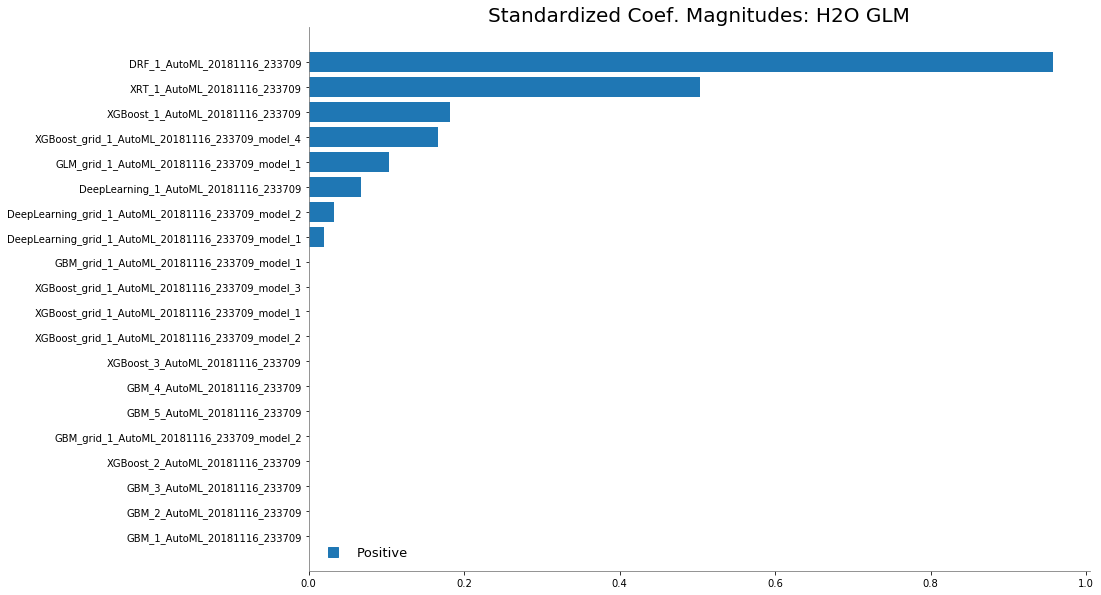

In [9]:
%matplotlib inline
metalearner.std_coef_plot()

In [8]:
aml.leader.download_mojo(path = "./product_model_bin/m20/v3/mojo", get_genmodel_jar = True)

'/home/siemanalyst/notebooks/siem/product_model_bin/m20/v3/mojo/GBM_4_AutoML_20181121_220237.zip'

In [9]:
sc.stop()